In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Overview Dataset**

In [2]:
dataset=pd.read_csv('/kaggle/input/malware-analysis-datasets-top1000-pe-imports/top_1000_pe_imports.csv')
dataset.head()

,hash,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,...,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
0,071e8c3f8922e186e57548cd4c703a5d,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,33f8e6d08a6aae939f25a8e0d63dd523,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,b68abd064e975e1c6d5f25e748663076,1,1,1,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
3,72049be7bd30ea61297ea624ae198067,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,c9b3700a77facf29172f32df6bc77f48,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47580 entries, 0 to 47579
Columns: 1002 entries, hash to malware
dtypes: int64(1001), object(1)
memory usage: 363.7+ MB


In [4]:
dataset.shape

(47580, 1002)

In [5]:
print(dataset.isnull().sum())

hash                         0
GetProcAddress               0
ExitProcess                  0
WriteFile                    0
GetLastError                 0
                            ..
GetSecurityDescriptorDacl    0
FindFirstFreeAce             0
GetTimeFormatW               0
LookupAccountSidW            0
malware                      0
Length: 1002, dtype: int64


In [6]:
print("Total missing values : ",sum(list(dataset.isna().sum())))

Total missing values :  0


In [7]:
benign = dataset.loc[dataset['malware']==0].drop(['malware', 'hash'], axis = 1)
malware = dataset.loc[dataset['malware']==1].drop(['malware', 'hash'], axis = 1)

In [8]:
print(f'The Number of important features is {malware.shape[1]} \n')

The Number of important features is 1000 



In [9]:
print("Malicious Samples: ", len(malware))
print("Benign Samples: ", len(benign))

Malicious Samples:  45651
Benign Samples:  1929


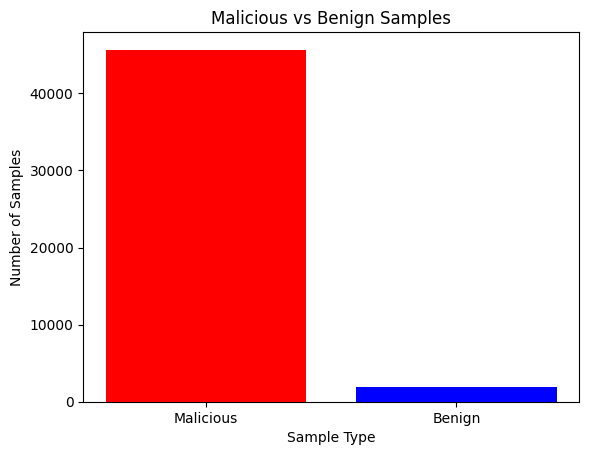

In [21]:
labels = ['Malicious', 'Benign']
values = [len(malware), len(benign)]

plt.bar(labels, values, color=['red', 'blue'])
plt.xlabel('Sample Type')
plt.ylabel('Number of Samples')
plt.title('Malicious vs Benign Samples')
plt.show()

# **Selection**

In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [12]:
Data = dataset.drop(['hash', 'malware'], axis=1).values
Target = dataset['malware'].values
FeatSelect = ExtraTreesClassifier().fit(Data, Target)
Model = SelectFromModel(FeatSelect, prefit=True)
Data_new = Model.transform(Data)
print (Data.shape)
print (Data_new.shape)

(47580, 1000)
(47580, 233)


# **Training**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(Data_new, Target, test_size=0.2, random_state=42)

# **Naive Bayes**

In [14]:
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [16]:
y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9275956284153005
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.67      0.46       433
           1       0.98      0.94      0.96      9083

    accuracy                           0.93      9516
   macro avg       0.67      0.81      0.71      9516
weighted avg       0.95      0.93      0.94      9516



In [17]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 292  141]
 [ 548 8535]]


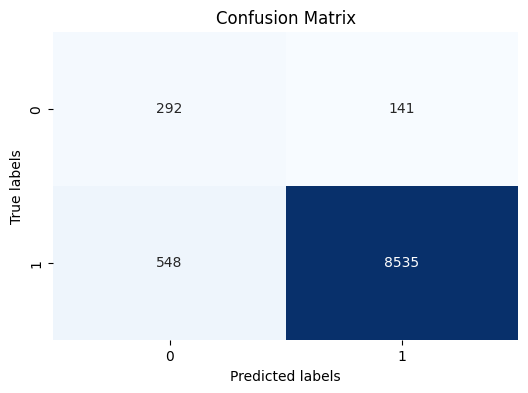

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues', cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
result=pd.DataFrame({
    "Predict_Value":y_pred,
    "Actual_Value":y_test
})

In [20]:
result

,Predict_Value,Actual_Value
0,1,1
1,1,1
2,1,1
3,0,1
4,1,0
...,...,...
9511,1,1
9512,1,1
9513,1,1
9514,1,1
